Considerando la siguiente ecuación en diferencias de un sistema discreto:
 
$y[n] =2.y[n−1]−1,81.y[n−2]+0,68.y[n−3]+x[n]+3.x[n−1]+3.x[n−2]+x[n−3]$

Sabiendo que $y[n-1] = y[n].z^{-1}$:

$y[n] =2.y[n]z^{-1}−1,81.y[n]z^{-2}+0,68.y[n]z^{-3}+x[n]+3.x[n]z^{-1}+3.x[n]z^{-2}+x[n]z^{-3}$

$y[n]-2.y[n]z^{-1}+1,81.y[n]z^{-2}-0,68.y[n]z^{-3} = x[n]+3.x[n]z^{-1}+3.x[n]z^{-2}+x[n]z^{-3}$

$y[n] (1-2z^{-1}+1,81z^{-2}-0,68z^{-3}) = x[n](1+3z^{-1}+3z^{-2}+z^{-3})$

$H[z] = \frac{y[n]}{x[n]} = \frac{1+3z^{-1}+3z^{-2}+z^{-3}}{1-2z^{-1}+1,81z^{-2}-0,68z^{-3}}$

Si ahora se reempla $z=e^{j\Omega}$ se obtendra modulo y fase:

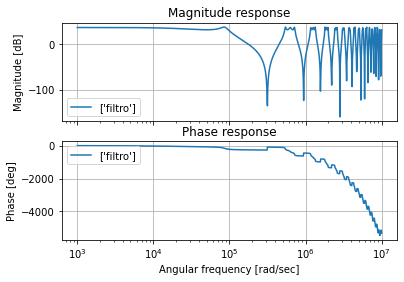

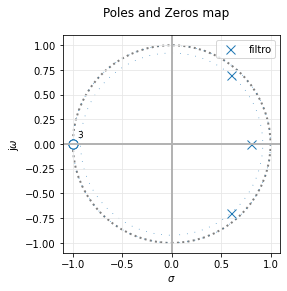

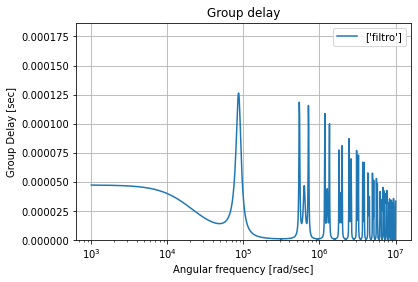

In [12]:
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt
from splane import analyze_sys

fs = 100000#Hz

a = np.array([1,-2,1.81,-0.68])#denominador
b = np.array([1,3,3,1])#numerador

my_tf = sig.TransferFunction(b,a,dt = 1/fs)
analyze_sys(my_tf,'filtro')

Si ahora a a la entrada tenemos:

$x(t)=10+5.cos(2\pi2000t−60º)+20.sen(2\pi 8000t+30º)$

Text(0, 0.5, 'y')

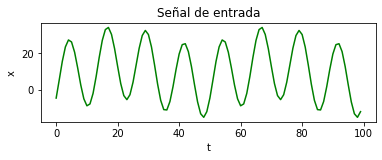

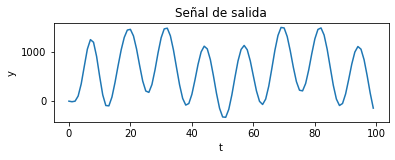

In [11]:
Ts = 1/fs
t = 0.001#s
n = t / Ts
n = np.arange(n)
x = 10 + 5*np.sin(2*np.pi*2000*n*Ts - 60*(np.pi/180)) + 20*np.sin(2*np.pi*8000*n*Ts - 30*(np.pi/180))

y = sig.lfilter(b, a, x)

plt.figure(1)
plt.subplot(211)
plt.title("Señal de entrada")
plt.plot(n, x, color='green') 
plt.xlabel('t') 
plt.ylabel('x') 

plt.figure(2)
plt.subplot(212)
plt.title("Señal de salida")
plt.plot(n, y)
plt.xlabel('t') 
plt.ylabel('y') 